# Regression

Import nessacary Packages and the dataset

In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,  QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Stocks_data = '/Users/jacobgyoerkoe/Desktop/ME315/FinalProject/dow_jones_index.data'
Stocks = pd.read_csv(Stocks_data, na_values='?').dropna()

Load Print out the hitters data type and head to check values

In [28]:
print(Stocks.dtypes)
print(Stocks.head())
print(Stocks.describe())

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object
   quarter stock       date    open    high     low   close     volume  \
1        1    AA  1/14/2011  $16.71  $16.71  $15.64  $15.97  242963398   
2        1    AA  1/21/2011  $16.19  $16.38  $15.60  $15.79  138428495   
3        1    AA  1/28/2011 

Changing Variables from objects to int

In [29]:
Stocks['open'] = Stocks['open'].replace({'\$':''}, regex = True).astype(float)
Stocks['high'] = Stocks['high'].replace({'\$':''}, regex = True).astype(float)
Stocks['low'] = Stocks['low'].replace({'\$':''}, regex = True).astype(float)
Stocks['close'] = Stocks['close'].replace({'\$':''}, regex = True).astype(float)
Stocks['next_weeks_open'] = Stocks['next_weeks_open'].replace({'\$':''}, regex = True).astype(float)
Stocks['next_weeks_close'] = Stocks['next_weeks_close'].replace({'\$':''}, regex = True).astype(float)
print(Stocks.dtypes)
print(Stocks.head())

quarter                                 int64
stock                                  object
date                                   object
open                                  float64
high                                  float64
low                                   float64
close                                 float64
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                       float64
next_weeks_close                      float64
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object
   quarter stock       date   open   high    low  close     volume  \
1        1    AA  1/14/2011  16.71  16.71  15.64  15.97  242963398   
2        1    AA  1/21/2011  16.19  16.38  15.60  15.79  138428495   
3        1    AA  1/28/2011  15.87  16.6

Use a pairplot to Visualize the data and their correlations

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

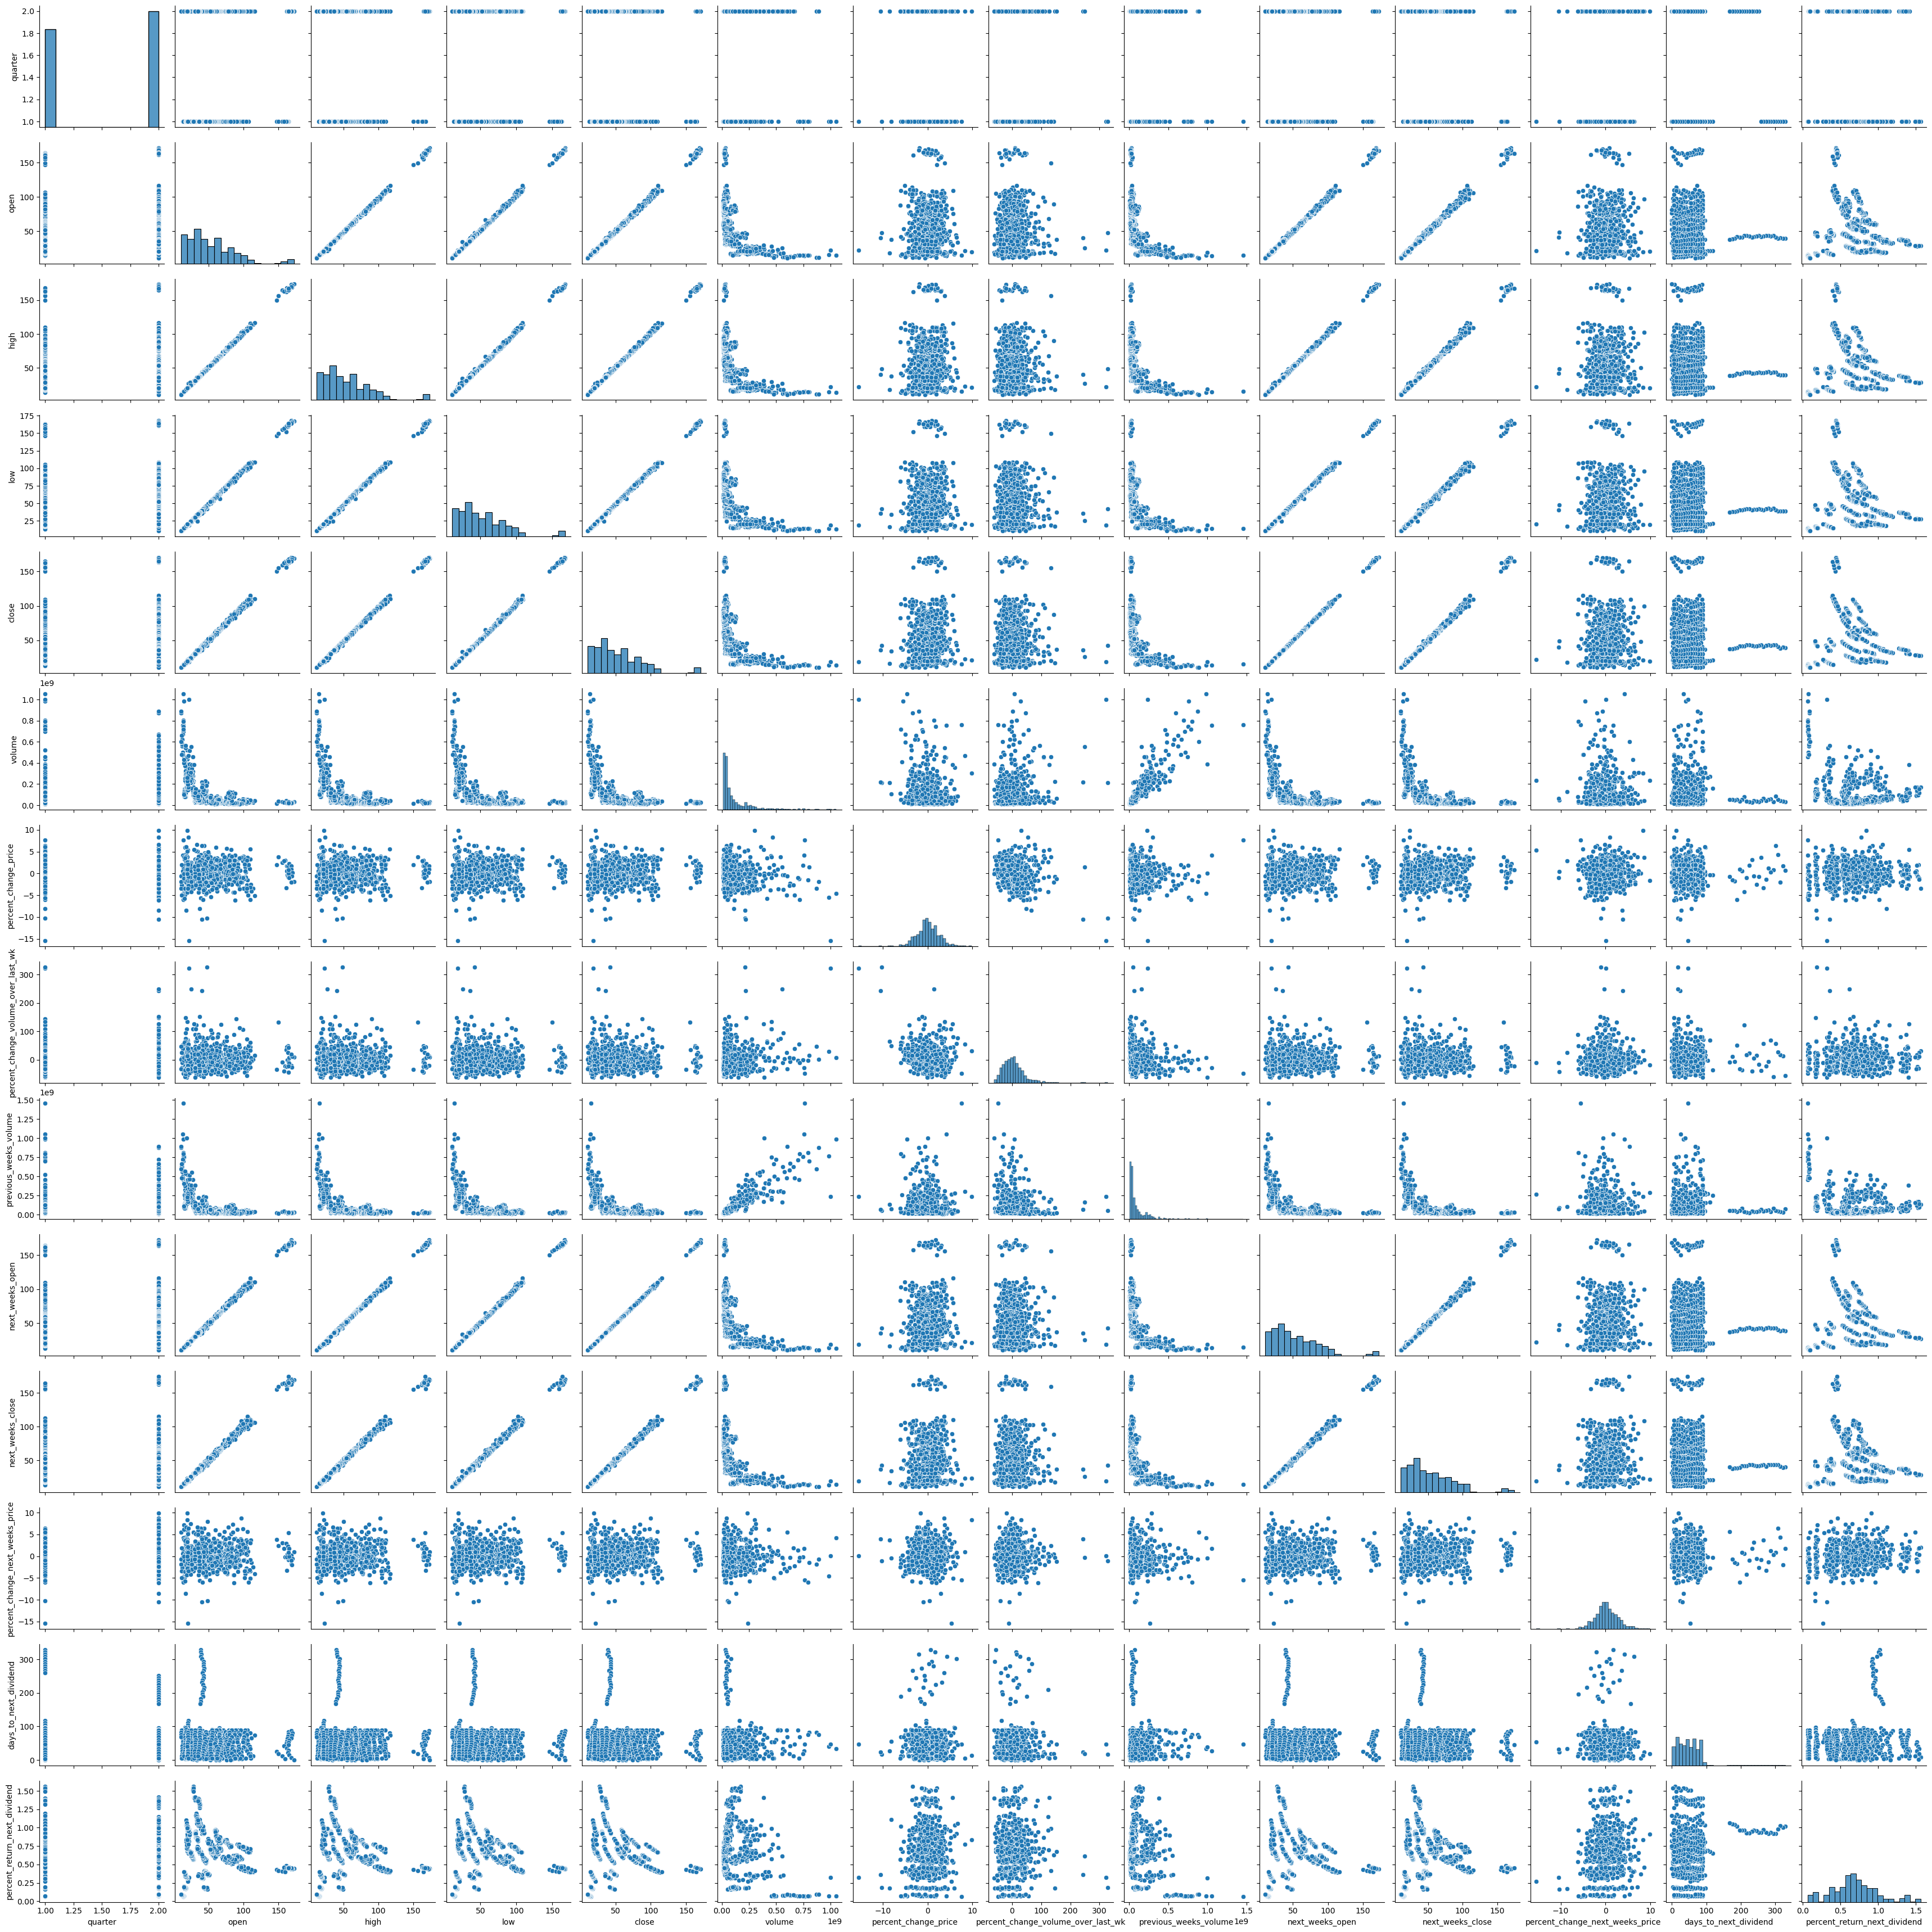

In [30]:
sns.pairplot(Stocks)

Check the correlation coeffiecents for all the variables

In [31]:
Stocks.drop(columns = ['stock', 'date']).corr()

,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
quarter,1.000000,0.023726,0.022625,0.022775,0.019811,-0.037889,-0.076259,0.023662,-0.057302,0.018354,0.017176,0.000098,-0.020749,-0.007963
open,0.023726,1.000000,0.999613,0.999339,0.999049,-0.522450,0.074321,-0.008510,-0.511910,0.998950,0.997774,0.066695,-0.059737,-0.147291
high,0.022625,0.999613,1.000000,0.999420,0.999555,-0.521307,0.091083,-0.006513,-0.511344,0.999476,0.998481,0.069589,-0.060586,-0.149462
low,0.022775,0.999339,0.999420,1.000000,0.999549,-0.524210,0.095997,-0.017541,-0.511540,0.999435,0.998299,0.067255,-0.060948,-0.144788
close,0.019811,0.999049,0.999555,0.999549,1.000000,-0.523935,0.110531,-0.016479,-0.511354,0.999917,0.998836,0.067789,-0.060981,-0.147205
volume,-0.037889,-0.522450,-0.521307,-0.524210,-0.523935,1.000000,-0.173245,0.181672,0.887631,-0.523710,-0.523208,-0.091106,-0.057734,-0.269797
percent_change_price,-0.076259,0.074321,0.091083,0.095997,0.110531,-0.173245,1.000000,-0.234496,-0.068675,0.110819,0.111796,0.020639,-0.009060,0.049963
percent_change_volume_over_last_wk,0.023662,-0.008510,-0.006513,-0.017541,-0.016479,0.181672,-0.234496,1.000000,-0.129519,-0.015416,-0.015660,0.013181,-0.033348,-0.017486
previous_weeks_volume,-0.057302,-0.511910,-0.511344,-0.511540,-0.511354,0.887631,-0.068675,-0.129519,1.000000,-0.511349,-0.511120,-0.102408,-0.047727,-0.270266
next_weeks_open,0.018354,0.998950,0.999476,0.999435,0.999917,-0.523710,0.110819,-0.015416,-0.511349,1.000000,0.998872,0.067147,-0.061205,-0.147101


Seperate the X and Y variables

In [51]:
X = Stocks.drop(columns = ['stock', 'date', 'percent_change_next_weeks_price'])
y = Stocks['percent_change_next_weeks_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=11)

Standardizing the Data

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Fitting the linear regression model

In [53]:
lm_fit = sm.OLS(y_train,X_train_scaled).fit()
y_pred_lin = lm_fit.predict(X_test_scaled)
mse_lin = mean_squared_error(y_test,y_pred_lin)
print("Test Mean Squared Error:", mse_lin)

Test Mean Squared Error: 1.9235507320041763


Fitting a ridge regression model

In [54]:
alpha = 1.0
elastic_net = ElasticNet(alpha=alpha, l1_ratio=0, max_iter=100, random_state=5)
elastic_net.fit(X_train_scaled, y_train)
print("Coefficients:")
print(elastic_net.coef_)
y_pred_ridge = elastic_net.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("\nMean Squared Error:", mse_ridge)

Coefficients:
[-0.01634056  0.02527284  0.03096954  0.02762673  0.02754674  0.02202354
 -0.02905285  0.02115672 -0.02538324  0.02565598  0.12875964 -0.05708581
  0.21573772]

Mean Squared Error: 6.477722237574669


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+03, tolerance: 2.752e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Fitting a lasso model

In [55]:
pipeline=Pipeline([('scaler', StandardScaler()), ('lasso', ElasticNet(l1_ratio=1, random_state=11))])
param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print("Best alpha parameter:", grid_search.best_params_['lasso__alpha'])
best_model = grid_search.best_estimator_
print("Coefficients of the final Lasso model:")
ridge_coefs = best_model.named_steps['lasso'].coef_
print(ridge_coefs)
y_pred_lasso = best_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Test Mean Squared Error:", mse_lasso)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best alpha parameter: 0.001
Coefficients of the final Lasso model:
[  0.11139647 -26.13709134  -3.49639387  -1.79192288  -5.18511314
  -0.33234965  -1.0951485    0.09449847   0.17713405  -4.68112876
  41.69825775  -0.05514944   0.34696996]
Test Mean Squared Error: 2.565334681552708


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.111e+02, tolerance: 2.412e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.714e+02, tolerance: 1.929e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.276e+02, toler

Print a comparison of all the different MSE

In [56]:
print("Test Mean Squared Error for Lasso:", mse_lasso)
print("\nMean Squared Error for Ridge:", mse_ridge)
print("Test Mean Squared Error for Linear:", mse_lin)

Test Mean Squared Error for Lasso: 2.565334681552708

Mean Squared Error for Ridge: 6.477722237574669
Test Mean Squared Error for Linear: 1.9235507320041763


# Classification

Importing the data set

In [24]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [59]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# metadata 
print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables) 

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

Create dummy variables for the all the variables

In [60]:
columns_to_dummy = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
X = pd.get_dummies(X, columns=columns_to_dummy, drop_first=True, dtype=int)

Test and Training split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.5,random_state=11)

Fit the LDA model

In [23]:
lda= LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred =lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print("Predicted class labels:", y_pred)
print("Actual class labels:", y_test.values)
print("Prediction accuracy:", accuracy)
print("Error rate:", error_rate)

Predicted class labels: ['good' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'acc'
 'acc' 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc'
 'unacc' 'acc' 'unacc' 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc'
 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'good' 'unacc' 'acc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'acc' 'unacc' 'unacc'
 'acc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'acc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'acc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'acc' 'unacc' 'unacc' 'vgood' 'acc' 'unacc' 'acc' 'unacc' 'acc'
 'acc' 'acc' 'good' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'acc'

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fit the QDA model

In [17]:
qda= QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred =qda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print("Predicted class labels:", y_pred)
print("Actual class labels:", y_test.values)
print("Prediction accuracy:", accuracy)
print("Error rate:", error_rate)

Predicted class labels: ['acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc'
 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc'
 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc'
 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc'
 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc'
 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc'
 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc'
 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc'
 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc'
 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc'
 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc'
 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc'
 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc' 'acc'
 'acc' 'acc' 'acc' 'acc' 'a

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


In [ ]:
Fit a KNN model

In [69]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn_pred=knn.predict(X_test)
accuracy = accuracy_score(y_test, knn_pred)
error_rate = 1 - accuracy
print("Predicted class labels:", knn_pred)
print("Actual class labels:", y_test.values)
print("Prediction accuracy:", accuracy)
print("Error rate:", error_rate)

Predicted class labels: ['good' 'vgood' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'acc'
 'good' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc'
 'good' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'acc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc'
 'good' 'acc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'good' 'good' 'unacc'
 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'u

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
